In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
FB=pd.read_csv('FB.csv')
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-28,187.199997,189.529999,185.080002,189.399994,189.399994,13657900
1,2019-10-29,191.690002,192.529999,188.470001,189.309998,189.309998,13574900
2,2019-10-30,189.559998,190.449997,185.979996,188.250000,188.250000,28734600
3,2019-10-31,196.699997,198.089996,188.250000,191.649994,191.649994,42286500
4,2019-11-01,192.850006,194.110001,189.910004,193.619995,193.619995,21711800
...,...,...,...,...,...,...,...
247,2020-10-20,263.059998,269.700012,262.880005,267.559998,267.559998,18763200
248,2020-10-21,279.559998,283.049988,276.369995,278.730011,278.730011,28998600
249,2020-10-22,279.869995,282.450012,275.040009,278.119995,278.119995,16720000
250,2020-10-23,278.799988,285.239990,276.820007,284.790009,284.790009,17490700


In [11]:
FB=FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2019-10-28,2019-10-28,187.199997,189.529999,185.080002,189.399994,189.399994,13657900
2019-10-29,2019-10-29,191.690002,192.529999,188.470001,189.309998,189.309998,13574900
2019-10-30,2019-10-30,189.559998,190.449997,185.979996,188.250000,188.250000,28734600
2019-10-31,2019-10-31,196.699997,198.089996,188.250000,191.649994,191.649994,42286500
2019-11-01,2019-11-01,192.850006,194.110001,189.910004,193.619995,193.619995,21711800
...,...,...,...,...,...,...,...
2020-10-20,2020-10-20,263.059998,269.700012,262.880005,267.559998,267.559998,18763200
2020-10-21,2020-10-21,279.559998,283.049988,276.369995,278.730011,278.730011,28998600
2020-10-22,2020-10-22,279.869995,282.450012,275.040009,278.119995,278.119995,16720000
2020-10-23,2020-10-23,278.799988,285.239990,276.820007,284.790009,284.790009,17490700


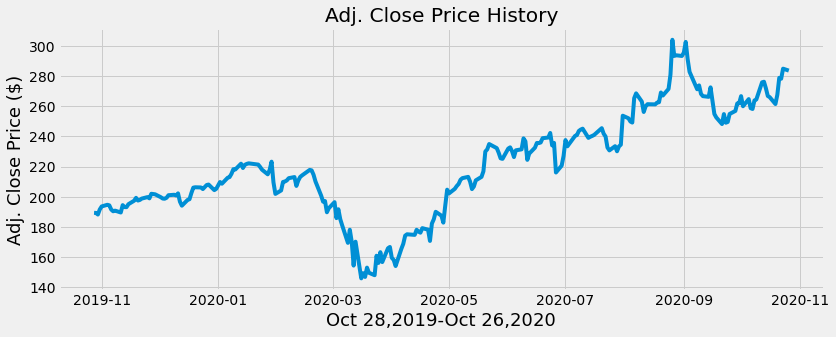

In [15]:
plt.figure(figsize=(12.2,4.5))
plt.plot(FB.index,FB['Adj Close'],label='Adj Close')
plt.title('Adj. Close Price History')
plt.xlabel('Oct 28,2019-Oct 26,2020',fontsize=18)
plt.ylabel('Adj. Close Price ($)',fontsize=18)
plt.show()


In [16]:
delta=FB['Adj Close'].diff(1)
delta

2019-10-28          NaN
2019-10-29    -0.089996
2019-10-30    -1.059998
2019-10-31     3.399994
2019-11-01     1.970001
                ...    
2020-10-20     6.160004
2020-10-21    11.170013
2020-10-22    -0.610016
2020-10-23     6.670014
2020-10-26    -1.270112
Name: Adj Close, Length: 252, dtype: float64

In [17]:
delta=delta.dropna()
delta

2019-10-29    -0.089996
2019-10-30    -1.059998
2019-10-31     3.399994
2019-11-01     1.970001
2019-11-04     1.100006
                ...    
2020-10-20     6.160004
2020-10-21    11.170013
2020-10-22    -0.610016
2020-10-23     6.670014
2020-10-26    -1.270112
Name: Adj Close, Length: 251, dtype: float64

In [18]:
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0


In [19]:
period=14
AVG_Gain=up.rolling(window=period).mean()
AVG_Loss=abs(down.rolling(window=period).mean())


In [25]:
#Calculte Relative Strength Index (RSI)
RS=AVG_Gain/AVG_Loss
RSI=100-(100/(1+RS))

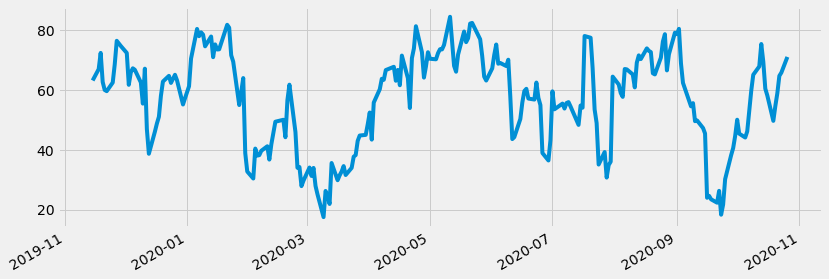

In [26]:
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [27]:
new_df=pd.DataFrame()
new_df['Adj Close']=FB['Adj Close']
new_df['RSI']=RSI
new_df

,Adj Close,RSI
2019-10-28,189.399994,NaN
2019-10-29,189.309998,NaN
2019-10-30,188.250000,NaN
2019-10-31,191.649994,NaN
2019-11-01,193.619995,NaN
...,...,...
2020-10-20,267.559998,54.595647
2020-10-21,278.730011,58.894440
2020-10-22,278.119995,64.675471
2020-10-23,284.790009,65.758989


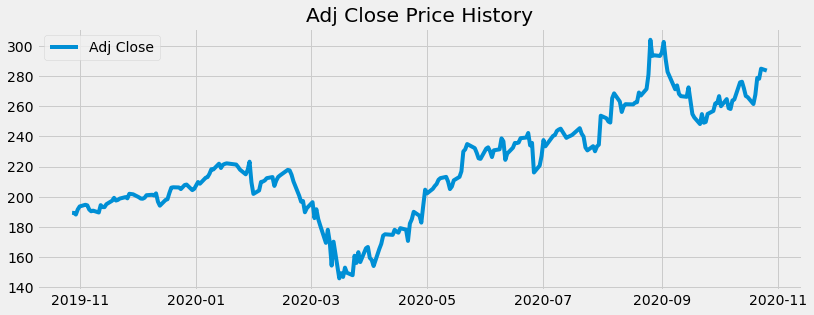

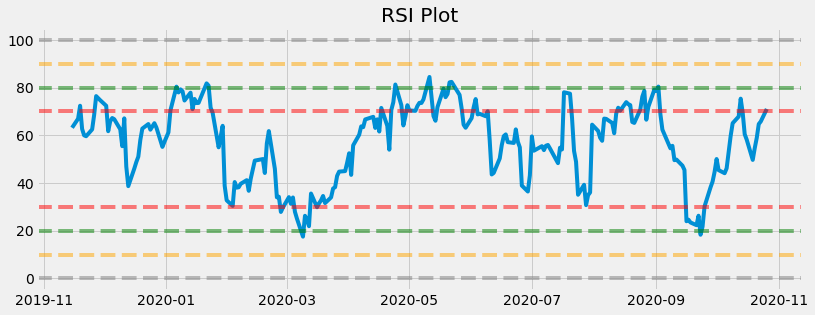

In [28]:
#Adj Close price vs RSI
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index,new_df['Adj Close'])
plt.title('Adj Close Price History')
plt.legend(new_df.columns.values,loc='upper left')
plt.show()
#RSI values vs significant levels
plt.figure(figsize=(12.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index,new_df['RSI'])
plt.axhline(0,linestyle='--',alpha=0.5,color='gray')
plt.axhline(10,linestyle='--',alpha=0.5,color='orange')
plt.axhline(20,linestyle='--',alpha=0.5,color='green')
plt.axhline(30,linestyle='--',alpha=0.5,color='red')
plt.axhline(70,linestyle='--',alpha=0.5,color='red')
plt.axhline(80,linestyle='--',alpha=0.5,color='green')
plt.axhline(90,linestyle='--',alpha=0.5,color='orange')
plt.axhline(100,linestyle='--',alpha=0.5,color='gray')
plt.show()
